In [3]:
import os
import re
from glob import glob
from pandas import read_csv
from matplotlib import pyplot as plt
import torch
import numpy as np

In [ ]:
data_dir = ''
data_paths = [d.path for d in os.scandir(data_dir)]
file_names = [os.path.basename(d) for d in data_paths]
sentence_nums = [re.sub(r'[^0-9]', '', d.split('_')[2]) for d in file_names]
speaker_names = [re.sub(r'[0-9]+', '', d.split('_')[2]) for d in file_names]

In [4]:
audio_blob_path = '/shared/air/shared/youngkim/mediazen/preprocessed/ggongggong2/audio_ggongggong.pt'
shape_blob_path = '/shared/air/shared/youngkim/mediazen/preprocessed/ggongggong2/shape_ggongggong.pt'

sample_rate, indices, audio_data, audio_lengths = torch.load(audio_blob_path)
timecodes, blendshape_count, blendshape_columns, shape_data, shape_lengths, f_names = torch.load(shape_blob_path)

In [57]:
speakers = {re.sub(r'[0-9]+', '', name.split('_')[2]) for name in f_names}
speakers

{'AanSeoHue',
 'AnnSeoHue',
 'LeeYooHonew',
 'LeeYuJin',
 'Ohongsuck',
 'SeoHeeJoo',
 'Suljuhwan',
 'bbs',
 'hbinew',
 'hynew',
 'jiha',
 'kmg',
 'kye',
 'lcy',
 'mjki',
 'ohongsuck'}

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit


speakers = ['jiha']

sentence_nums = [re.sub(r'[^0-9]', '', d.split('_')[2]) for d in f_names]
speaker_names = [re.sub(r'[0-9]+', '', d.split('_')[2]) for d in f_names]

test_sentences = [5, 11, 18, 147, 183]
train_valid_data_names = [d for i, d in enumerate(f_names) if int(sentence_nums[i]) not in test_sentences if speaker_names[i] in speakers]
test_data_names = [d for i, d in enumerate(f_names) if int(sentence_nums[i]) in test_sentences if speaker_names[i] in speakers]

sss = ShuffleSplit(n_splits=1, test_size=0.1, random_state=1234)
indices = list(range(len(train_valid_data_names)))
train_valid_sentence_nums = [re.sub(r'[^0-9]', '', os.path.basename(d).split('_')[2]) for d in train_valid_data_names]
train_index, valid_index = next(iter(sss.split(indices, train_valid_sentence_nums)))

In [65]:
train_index, valid_index

(array([  6,  54,  97,   5, 110,  91, 134, 179,   7, 168,  94,   9,  58,
         92, 111,  43,  77, 142, 119,  40, 114, 186,  39,  25, 131, 135,
         99,  17,  11, 102, 129, 170, 173, 104, 108, 121,  27,  65, 183,
         63, 122, 151,  32,  49,  61,  93,  83,  20, 141, 125, 188, 169,
         35, 175,  42, 178,  36, 132,  57,  46,  67,  79, 149, 145, 164,
        189,  15,  24,  44,   8, 117,  56,  22, 190, 136, 181, 163,  73,
         12, 185, 165, 159,   1, 144, 138,  64,  52, 155, 126,  68,  71,
         21,  33,  90,  98,   0, 105, 147, 182,  62, 174, 187,  78, 157,
         55, 148, 103,  82,   4,  28,  10, 184, 180, 150, 133, 193, 109,
        172,  85,  18, 194,  86,  70,  72,  41,  16,  45,  84,  89, 113,
        162,  96, 191,  13,  87,  81, 156, 160,  60,  14, 107, 115, 140,
         19,   2,   3, 176,  75, 128, 139, 166,  34,  37,  76,  50, 127,
         80,  69, 112, 120, 118,  26, 124, 158, 171,  30, 154,  23, 177,
        143, 152, 116,  53,  38,  47]),
 array([101

In [49]:
sentence_dict = {int(re.sub(r'[^0-9]', '', name.split('_')[2])):[] for name in f_names}
for i, name in enumerate(f_names):
    sentence = int(re.sub(r'[^0-9]', '', name.split('_')[2]))
    speaker = re.sub(r'[0-9]+', '', name.split('_')[2])
    level = None
    if speaker in ['LeeYuJin', 'Suljuhwan', 'bbs', 'kmg', 'kye']:
        level = 'B'
    elif speaker in ['hynew', 'LeeYooHonew', 'mjki', 'jiha']:
        level = 'A'
    elif speaker in ['SeoHeeJoo', 'AnnSeoHue', 'ohongsuck', 'lcy', 'hbinew']:
        level = 'C'
    sentence_dict[sentence].append((i, name, speaker, level))

In [8]:
blendshape_columns

['JawForward',
 'JawOpen',
 'MouthClose',
 'MouthFunnel',
 'MouthPucker',
 'MouthDimpleLeft',
 'MouthDimpleRight',
 'MouthStretchLeft',
 'MouthStretchRight',
 'MouthRollLower',
 'MouthRollUpper',
 'MouthShrugLower',
 'MouthShrugUpper',
 'MouthPressLeft',
 'MouthPressRight',
 'CheekPuff']

In [44]:
sentence_dict.keys()

dict_keys([28, 119, 198, 35, 189, 122, 86, 17, 25, 9, 171, 92, 124, 117, 123, 30, 125, 51, 160, 192, 42, 98, 193, 36, 55, 143, 136, 50, 72, 33, 99, 105, 68, 44, 179, 67, 115, 88, 1, 148, 7, 2, 145, 47, 56, 186, 53, 130, 102, 131, 152, 195, 147, 183, 109, 63, 188, 159, 6, 61, 59, 175, 184, 146, 62, 79, 65, 172, 5, 16, 165, 153, 121, 194, 185, 91, 181, 169, 69, 43, 52, 170, 120, 106, 13, 54, 174, 134, 129, 21, 108, 29, 11, 137, 151, 190, 128, 133, 22, 66, 95, 100, 41, 89, 48, 144, 46, 173, 10, 149, 158, 78, 77, 57, 167, 138, 75, 187, 166, 110, 182, 20, 96, 71, 23, 176, 82, 24, 142, 140, 94, 127, 139, 197, 155, 49, 19, 200, 104, 116, 150, 164, 163, 37, 103, 74, 39, 141, 107, 45, 81, 73, 32, 191, 58, 70, 3, 156, 154, 85, 18, 196, 111, 84, 12, 113, 38, 178, 180, 76, 161, 118, 168, 83, 40, 199, 90, 64, 27, 26, 87, 177, 126, 135, 157, 132, 162, 101, 93, 8, 114, 31, 60, 15, 34, 97, 4, 80, 14, 112])

In [50]:
sentence_dict[147]

[(64, '895_20220823_LeeYuJin147_1', 'LeeYuJin', 'B'),
 (71, '1754_20220916_Suljuhwan147_0', 'Suljuhwan', 'B'),
 (264, '1589_20220914_SeoHeeJoo147_0', 'SeoHeeJoo', 'C'),
 (1035, '543_20220809_hynew147_1', 'hynew', 'A'),
 (1037, '793_20220812_bbs147_0', 'bbs', 'B'),
 (1042, '154_20220728_LeeYooHonew147_1', 'LeeYooHonew', 'A'),
 (1147, '1189_20220830_kmg147_2', 'kmg', 'B'),
 (1305, '353_20220808_mjki147_2', 'mjki', 'A'),
 (1312, '1928_20220920_AnnSeoHue147_0', 'AnnSeoHue', 'C'),
 (1340, '2482_20221006_jiha147_0', 'jiha', 'A'),
 (1428, '1389_20220902_kye147_2', 'kye', 'B'),
 (2145, '2118_20220922_ohongsuck147_0', 'ohongsuck', 'C'),
 (2293, '2307_20220927_lcy147_0', 'lcy', 'C'),
 (2542, '721_20220811_hbinew147_0', 'hbinew', 'C')]

In [88]:
# 같은 sentence 데이터 column 별 graph 찍어보기
from numpy import average, std, round_


sentence = 147
t = np.arange(0, shape_data.shape[1])
for i, column in enumerate(blendshape_columns):
    values_ = [
            [
                level, 
                round_(average(shape_data[:,:shape_lengths[idx],i][idx]), 4), 
                round_(std(shape_data[:,:shape_lengths[idx],i][idx].tolist()), 4), 
                round_(max(shape_data[:,:shape_lengths[idx],i][idx].tolist()), 4),
                speaker
            ] 
        for idx, name, speaker, level in sorted(sentence_dict[sentence], key=lambda x: x[3])]
    print(column)
    print(np.array(values_))

JawForward
[['A' '0.012' '0.0098' '0.0586' 'hynew']
 ['A' '0.0332' '0.0334' '0.245' 'LeeYooHonew']
 ['A' '0.0389' '0.0223' '0.1891' 'mjki']
 ['A' '0.0269' '0.0212' '0.1241' 'jiha']
 ['B' '0.0158' '0.0228' '0.2061' 'LeeYuJin']
 ['B' '0.0146' '0.0131' '0.0944' 'Suljuhwan']
 ['B' '0.0118' '0.0145' '0.0794' 'bbs']
 ['B' '0.015' '0.0156' '0.1656' 'kmg']
 ['B' '0.0104' '0.0133' '0.0988' 'kye']
 ['C' '0.0097' '0.01' '0.0801' 'SeoHeeJoo']
 ['C' '0.0203' '0.0196' '0.1178' 'AnnSeoHue']
 ['C' '0.0135' '0.0115' '0.0782' 'ohongsuck']
 ['C' '0.0216' '0.0067' '0.0509' 'lcy']
 ['C' '0.0169' '0.0172' '0.1009' 'hbinew']]
JawOpen
[['A' '0.057' '0.0528' '0.2907' 'hynew']
 ['A' '0.1199' '0.0983' '0.4931' 'LeeYooHonew']
 ['A' '0.1273' '0.0724' '0.3978' 'mjki']
 ['A' '0.0617' '0.062' '0.3801' 'jiha']
 ['B' '0.0575' '0.0679' '0.3588' 'LeeYuJin']
 ['B' '0.062' '0.0734' '0.3223' 'Suljuhwan']
 ['B' '0.045' '0.0508' '0.2836' 'bbs']
 ['B' '0.0527' '0.0496' '0.217' 'kmg']
 ['B' '0.0626' '0.0834' '0.4401' 'kye']
 ['

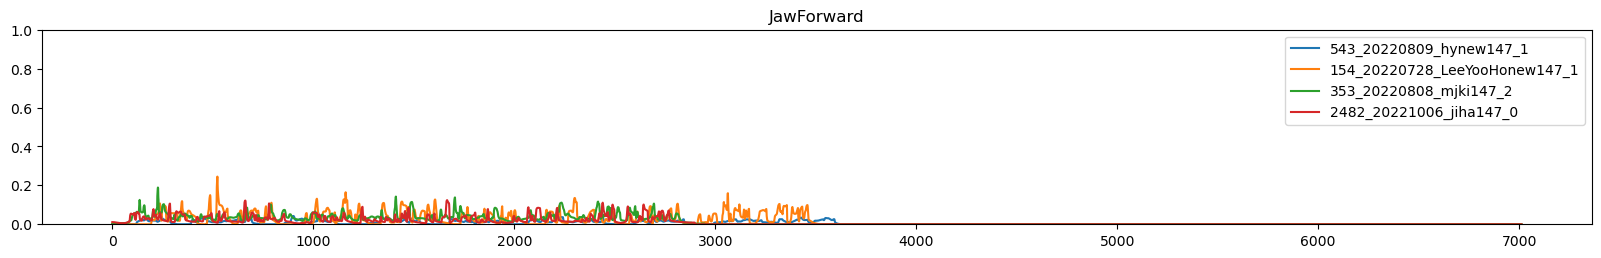

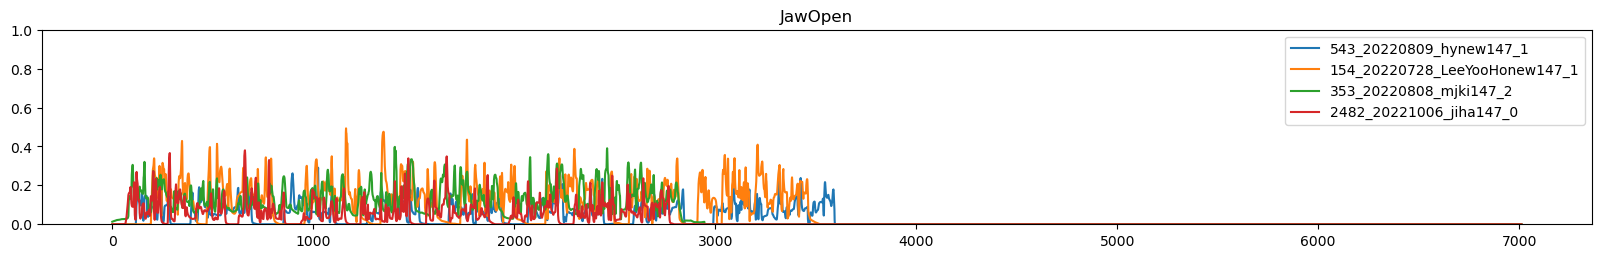

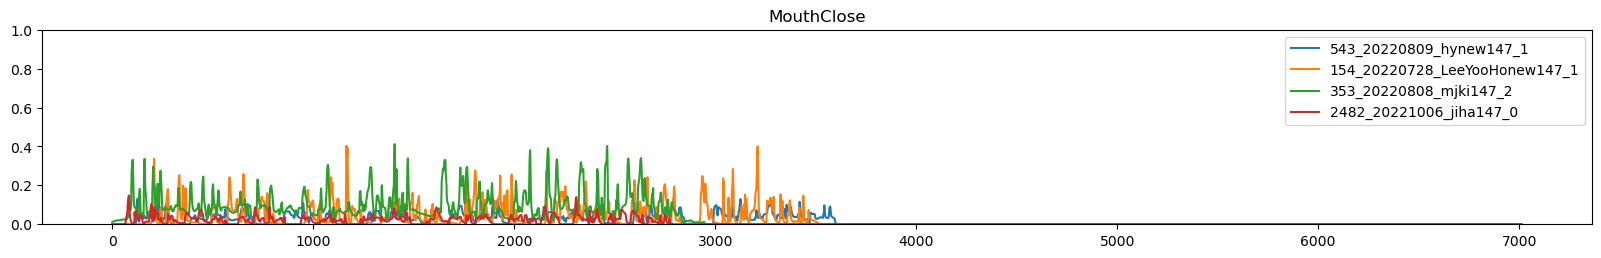

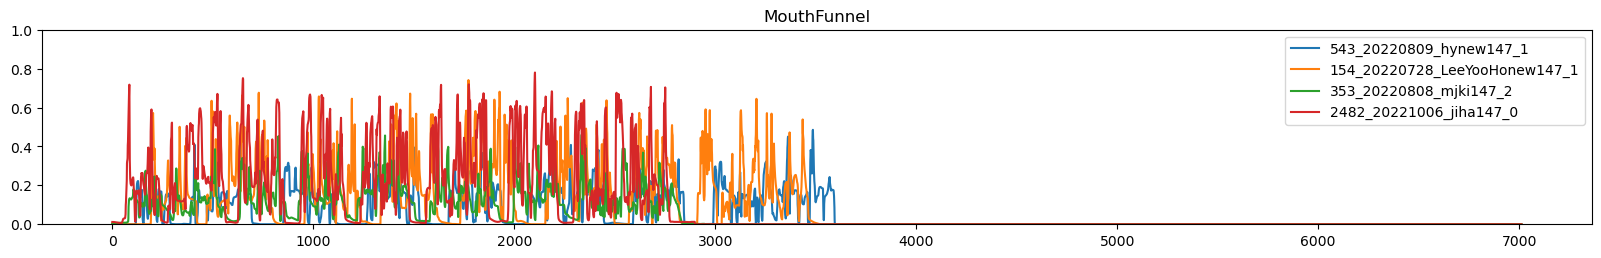

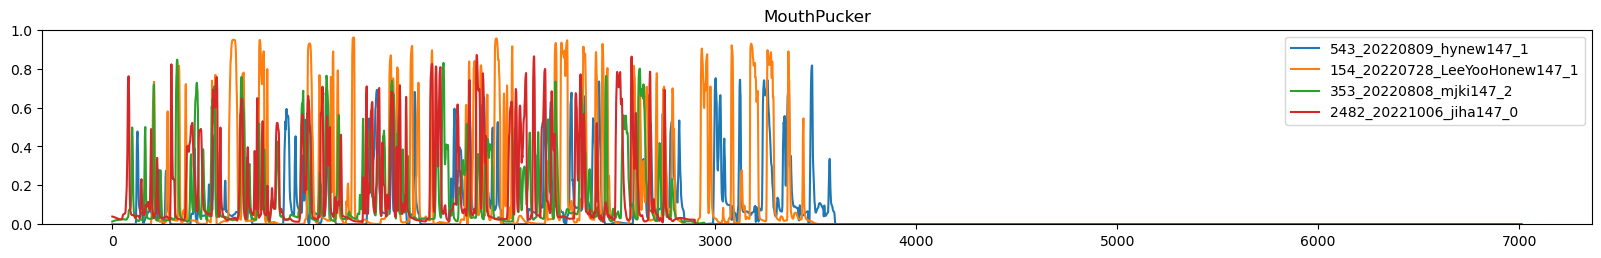

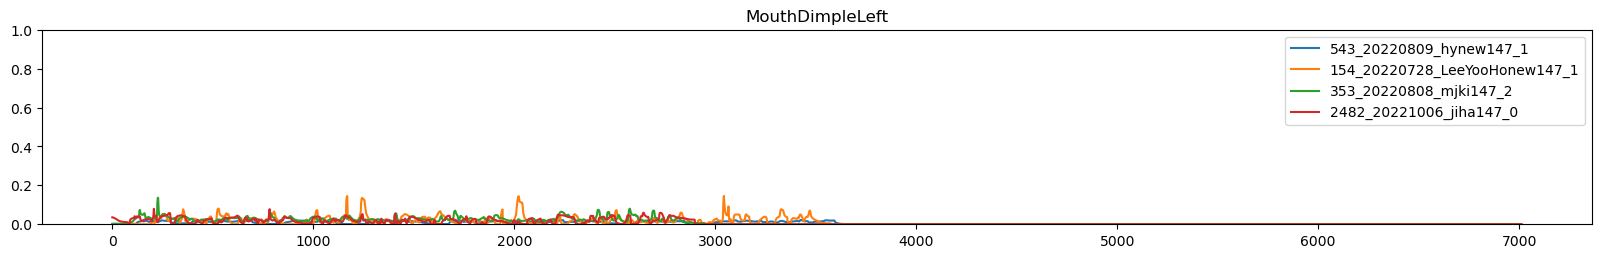

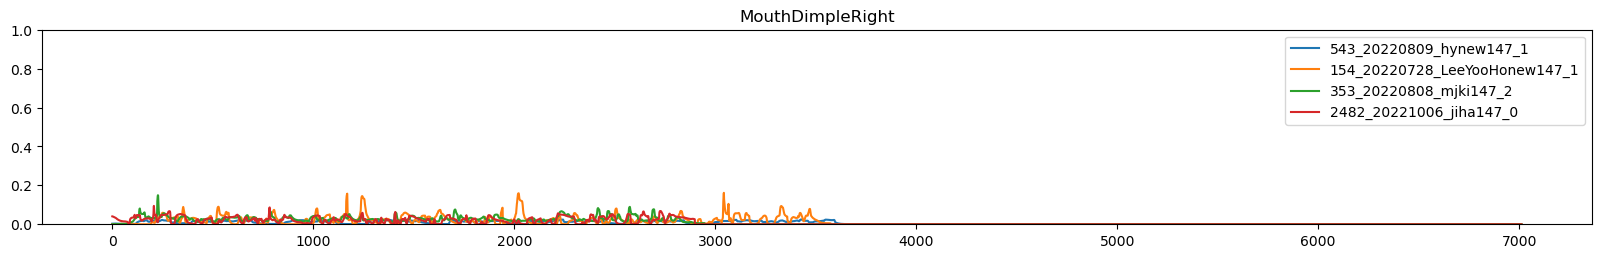

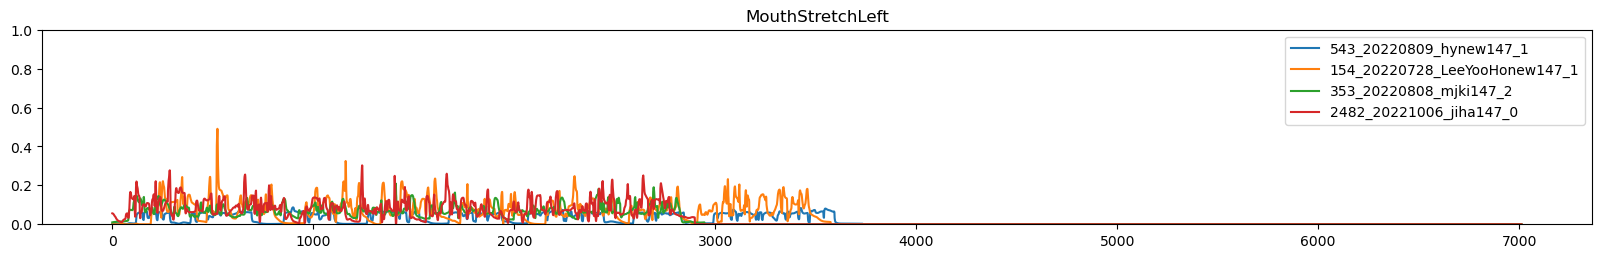

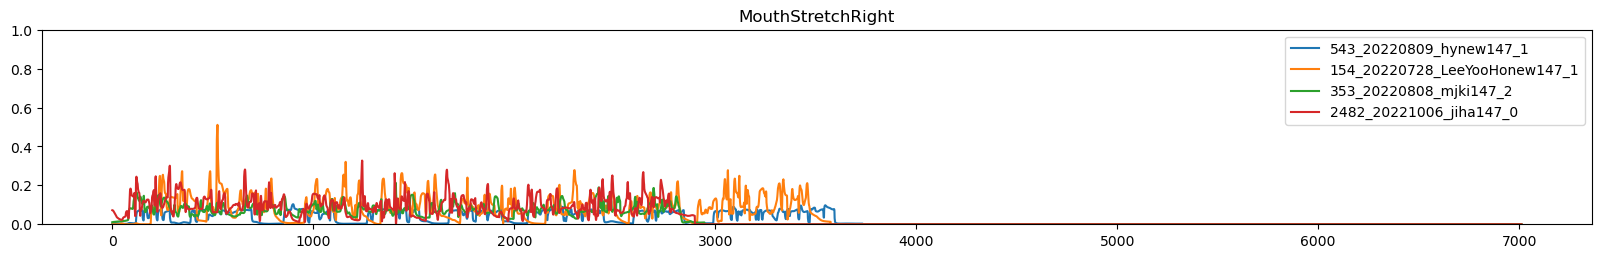

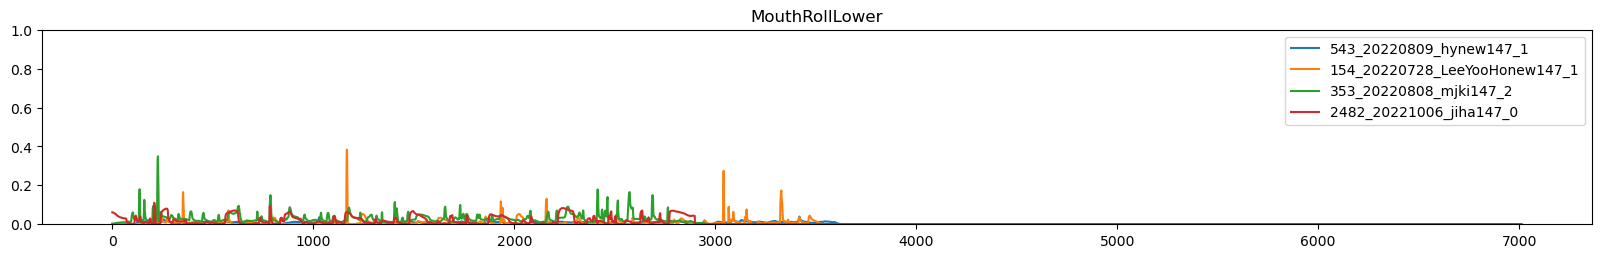

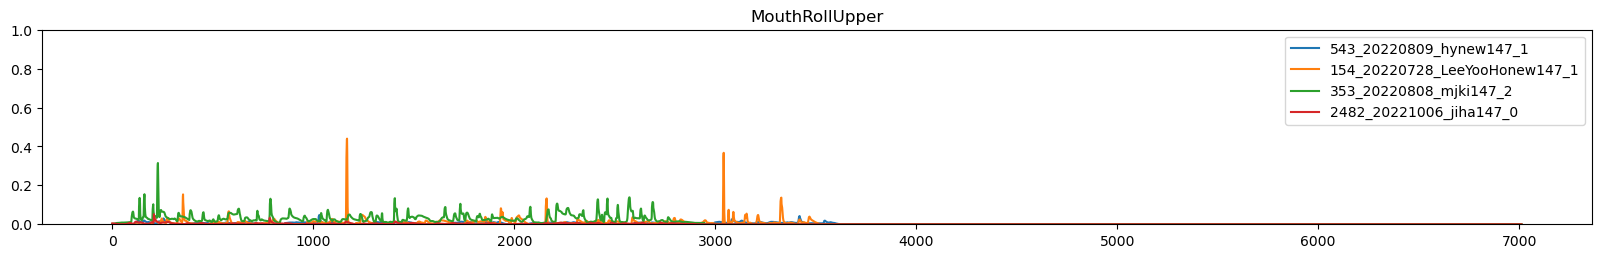

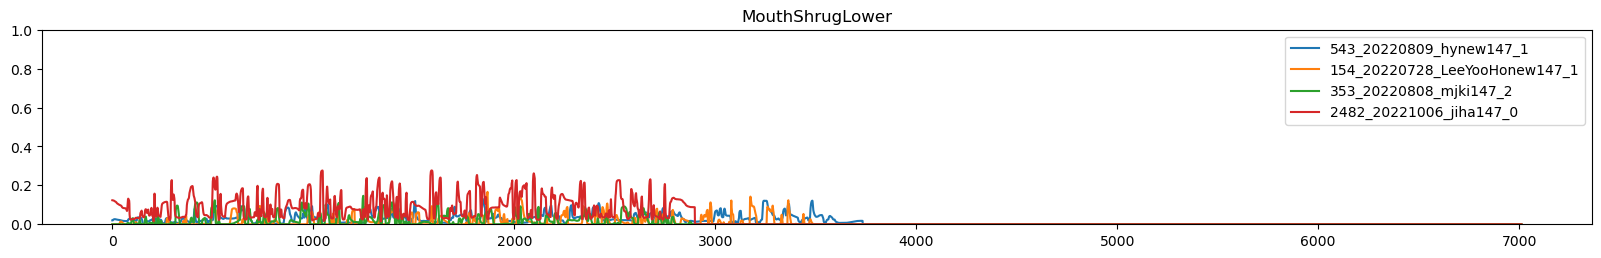

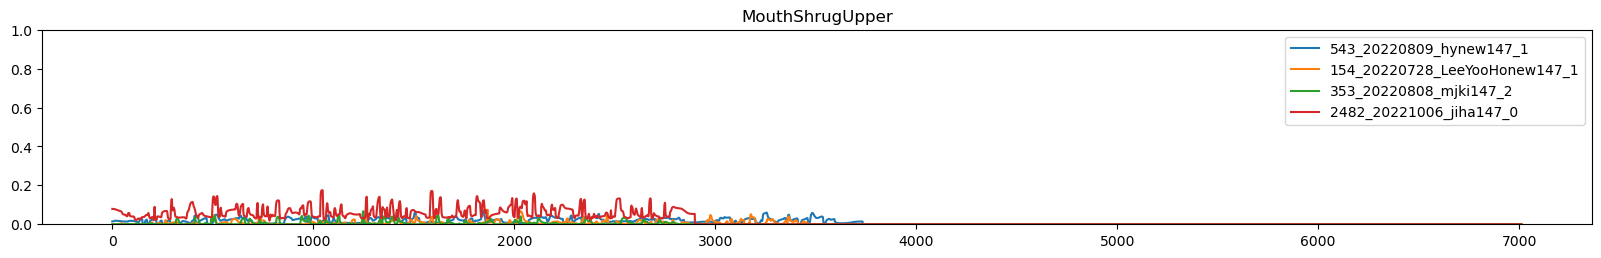

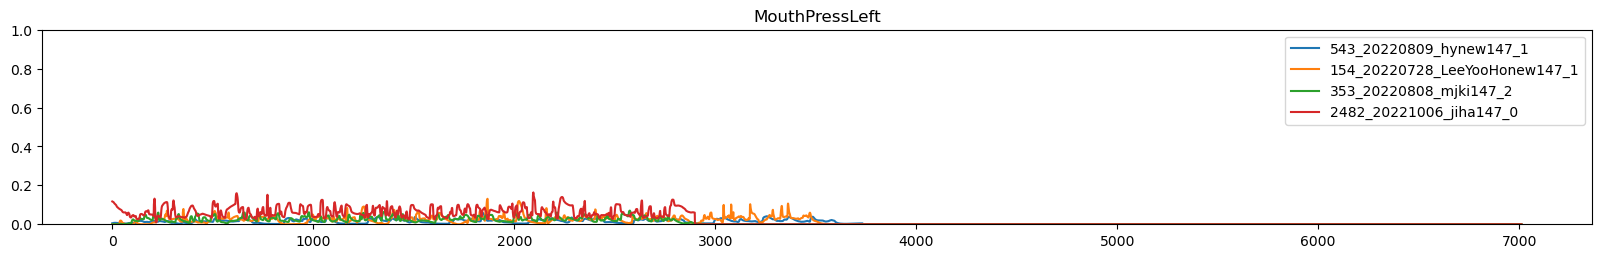

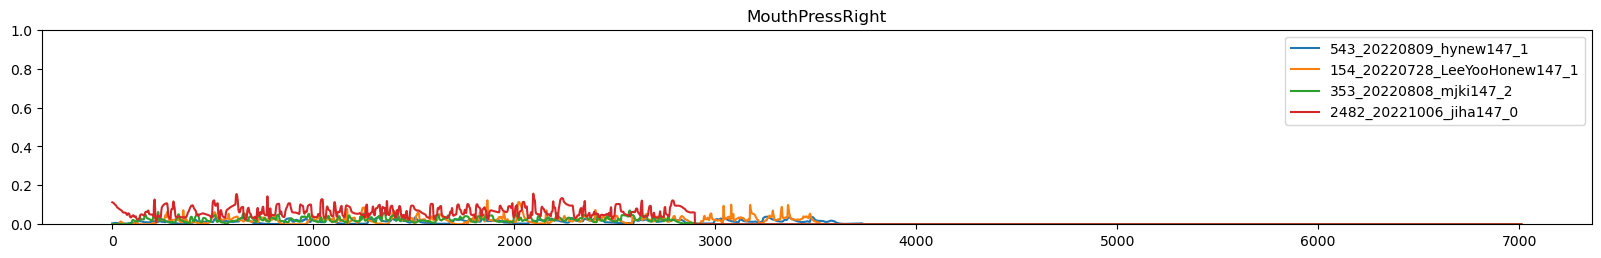

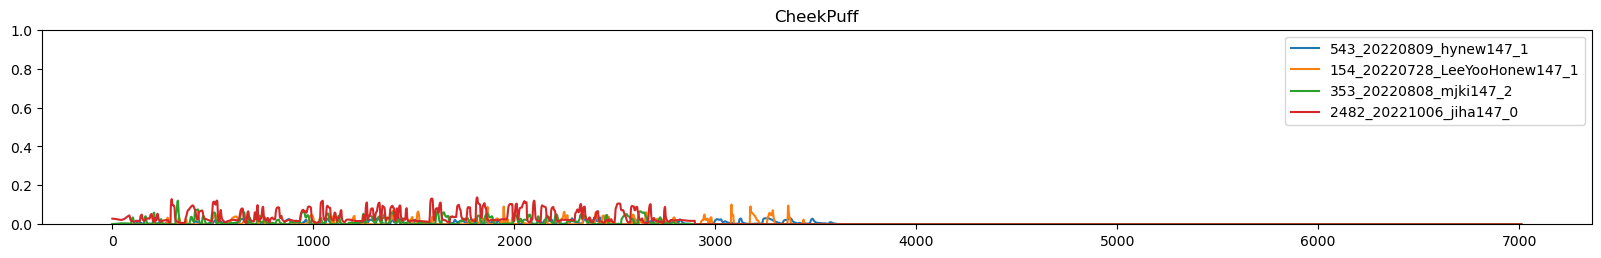

In [56]:
# 같은 sentence 데이터 column 별 graph 찍어보기
sentence = 147
t = np.arange(0, shape_data.shape[1])
for i, column in enumerate(blendshape_columns):
    plt.figure(figsize=(20,3*16))
    plt.subplot(len(blendshape_columns), 1, i+1)
    [plt.plot(t, shape_data[:,:,i][idx], label=name) for idx, name, speaker, level in sentence_dict[sentence] if level=='A']
    plt.legend()
    plt.title(column)
    plt.ylim([0, 1])
    plt.show()

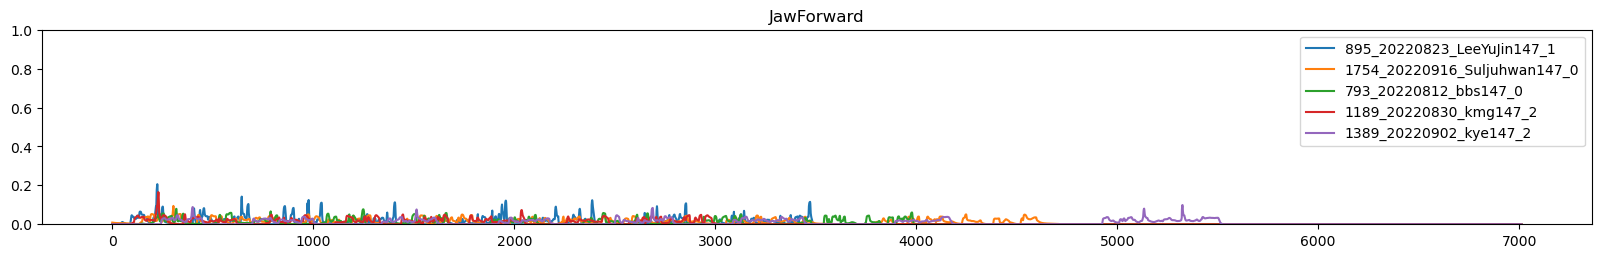

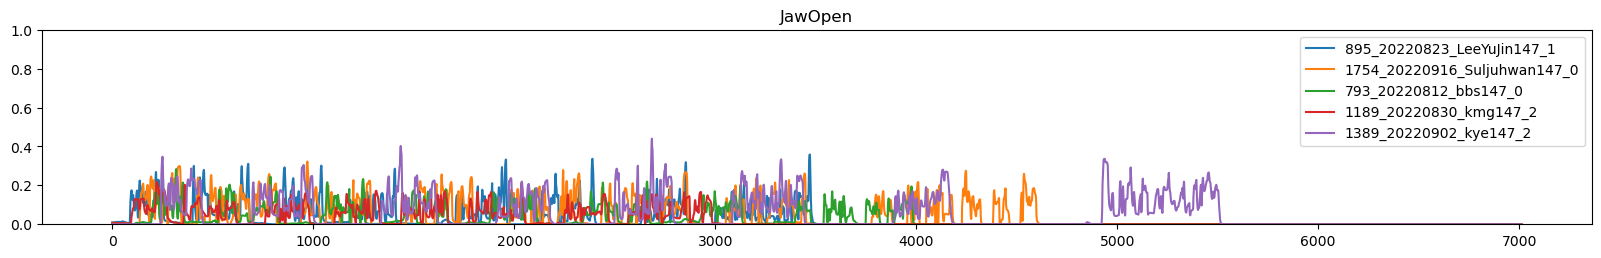

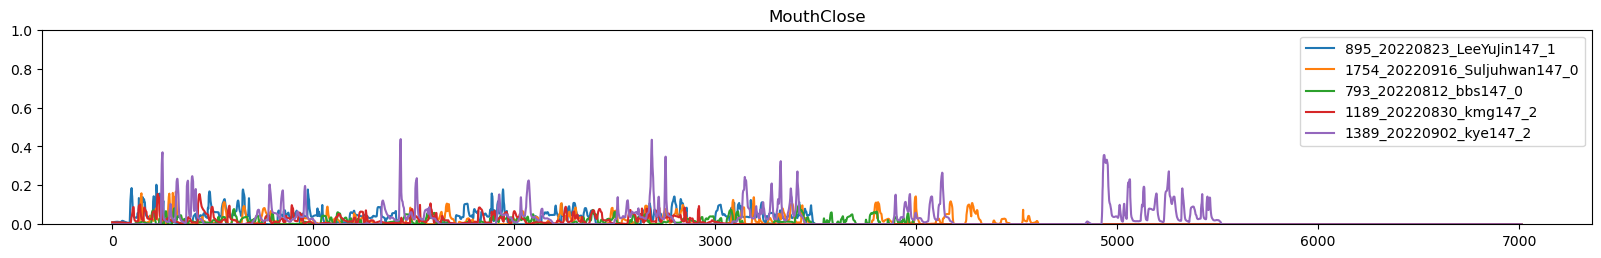

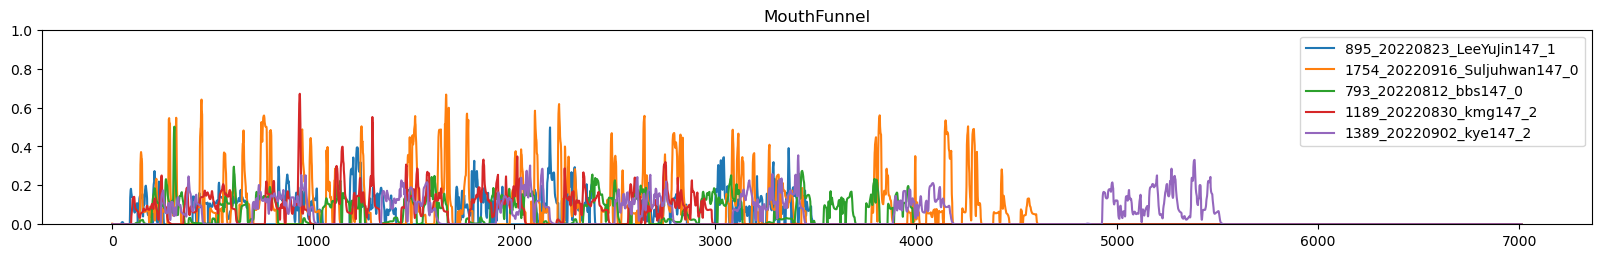

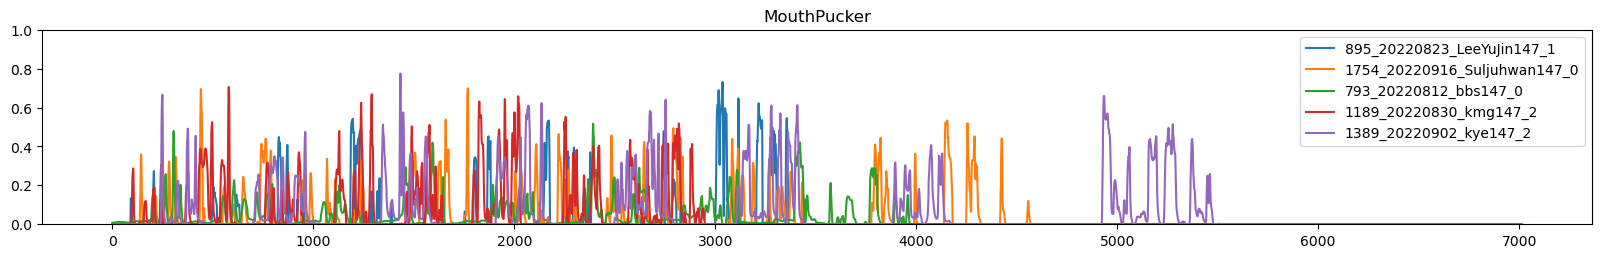

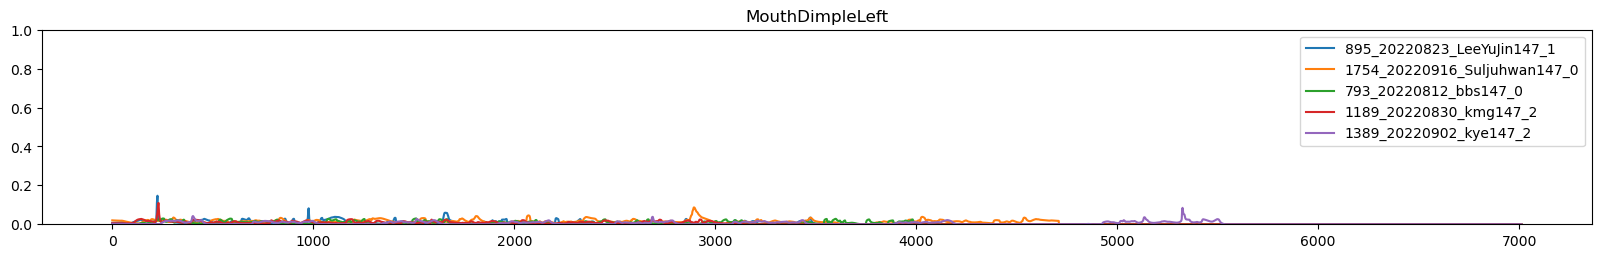

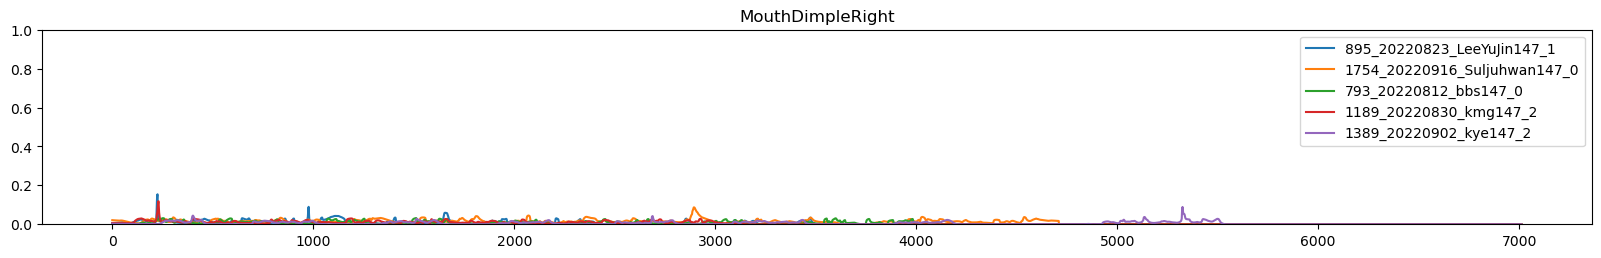

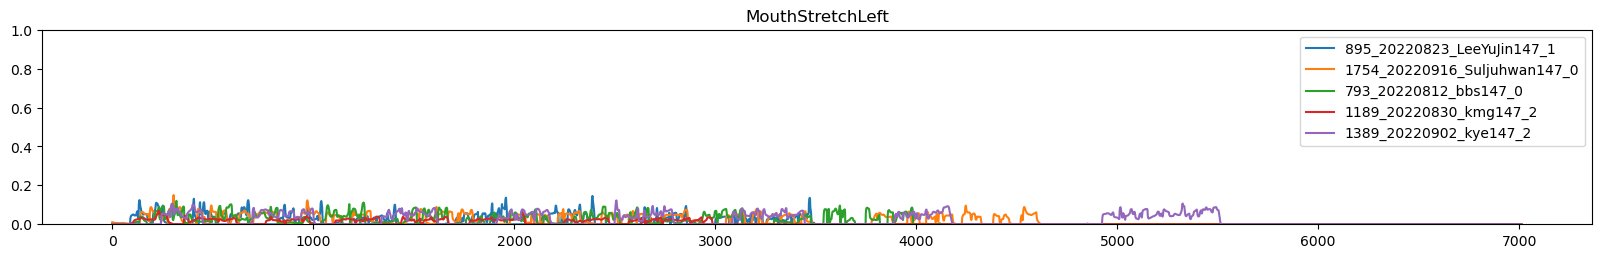

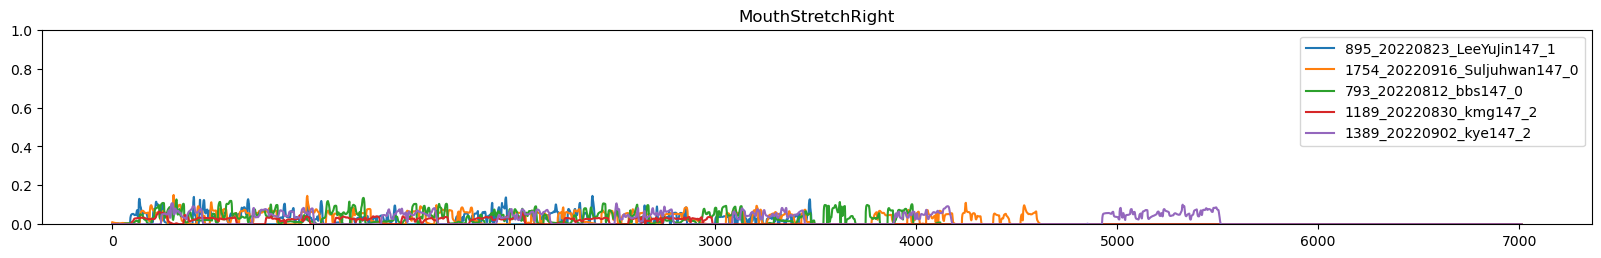

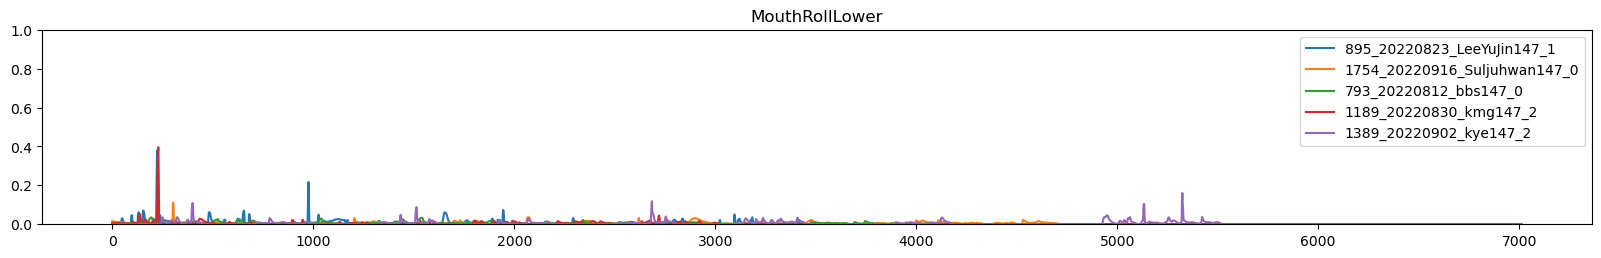

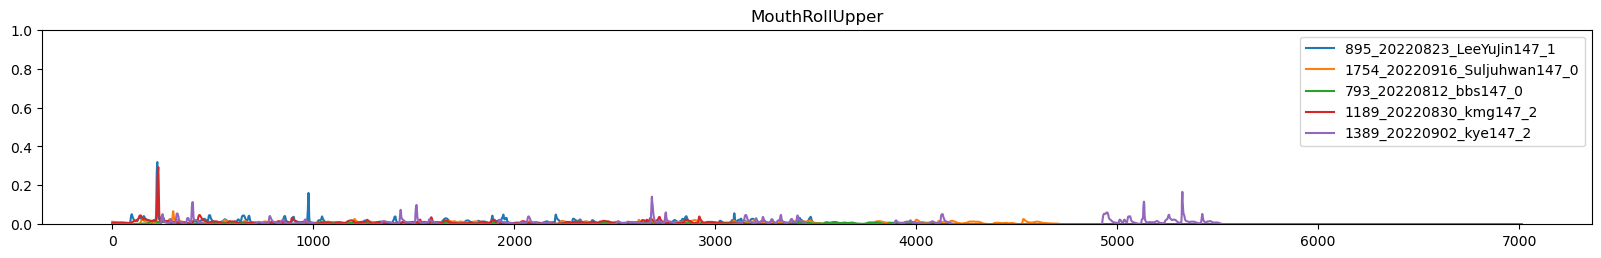

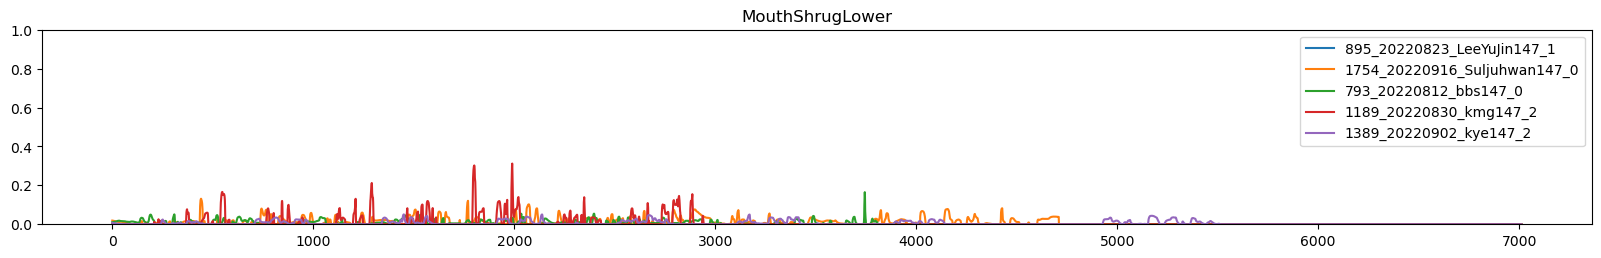

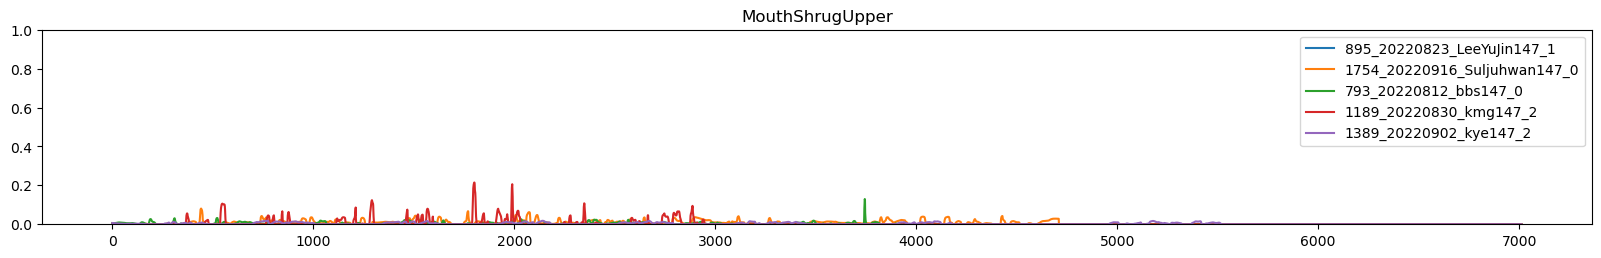

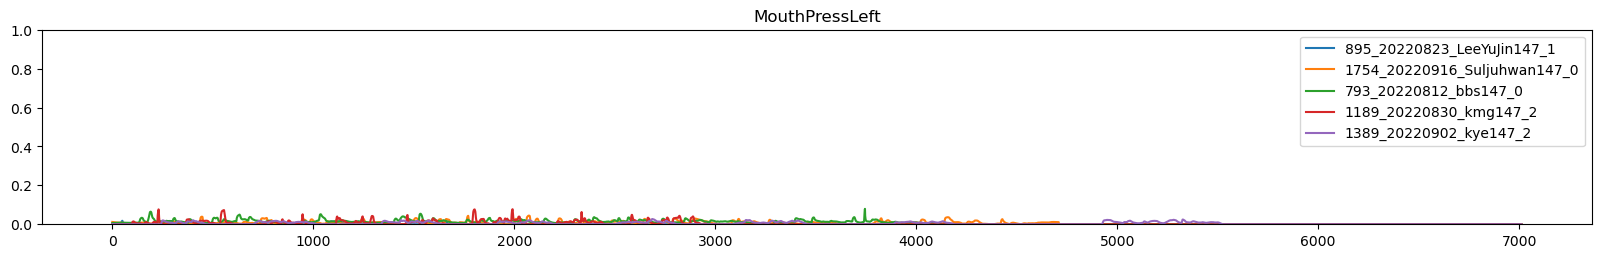

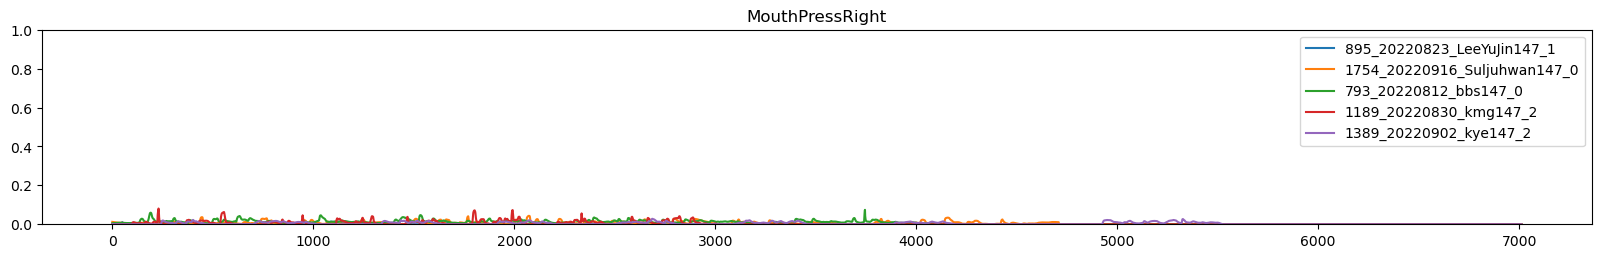

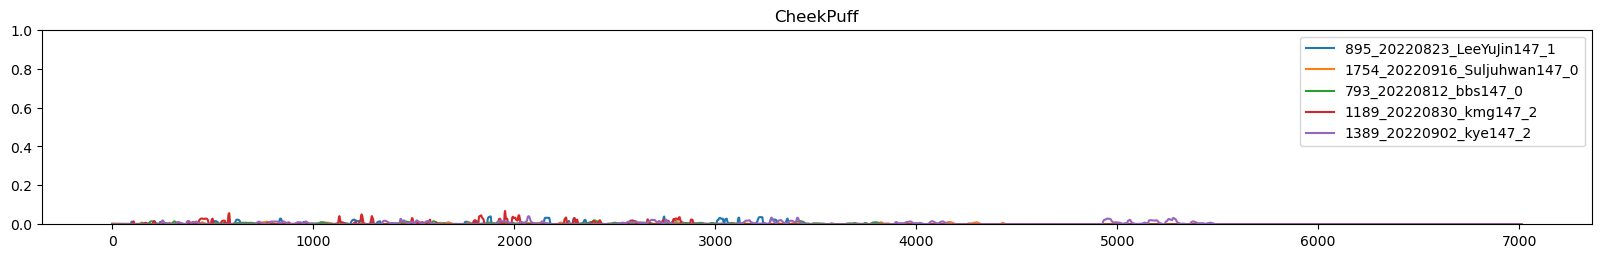

In [55]:
# 같은 sentence 데이터 column 별 graph 찍어보기
sentence = 147
t = np.arange(0, shape_data.shape[1])
for i, column in enumerate(blendshape_columns):
    plt.figure(figsize=(20,3*16))
    plt.subplot(len(blendshape_columns), 1, i+1)
    [plt.plot(t, shape_data[:,:,i][idx], label=name) for idx, name, speaker, level in sentence_dict[sentence] if level=='B']
    plt.legend()
    plt.title(column)
    plt.ylim([0, 1])
    plt.show()

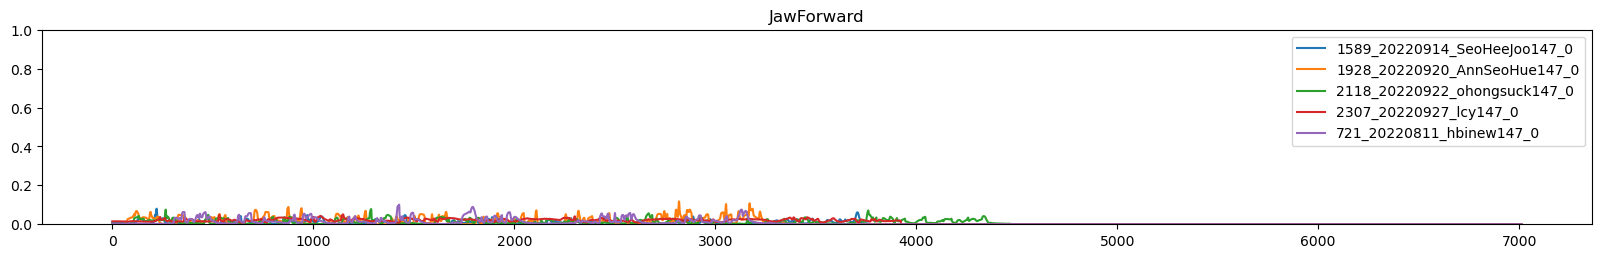

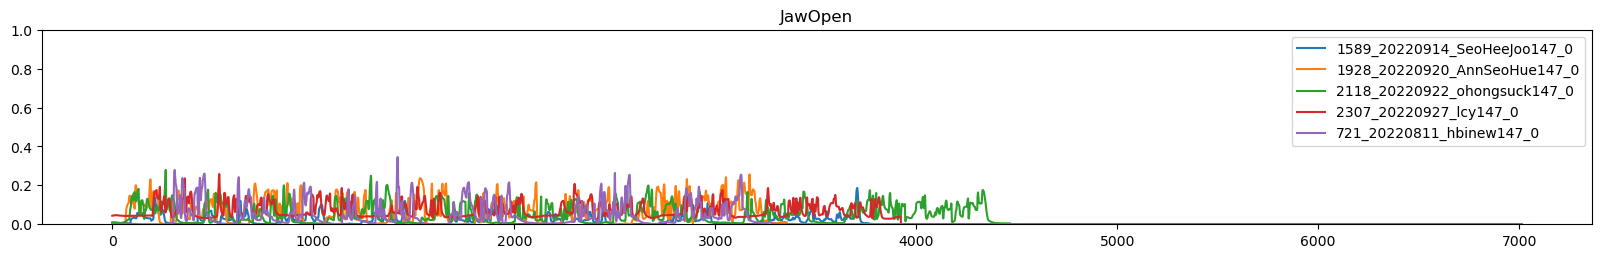

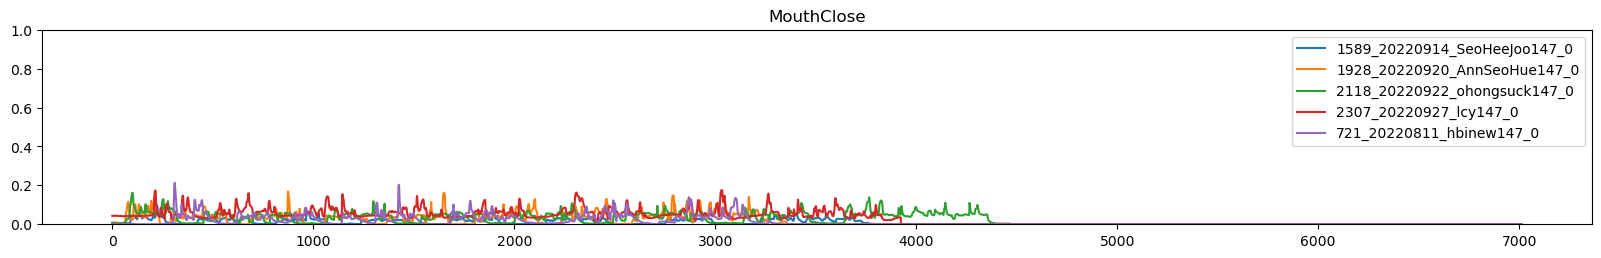

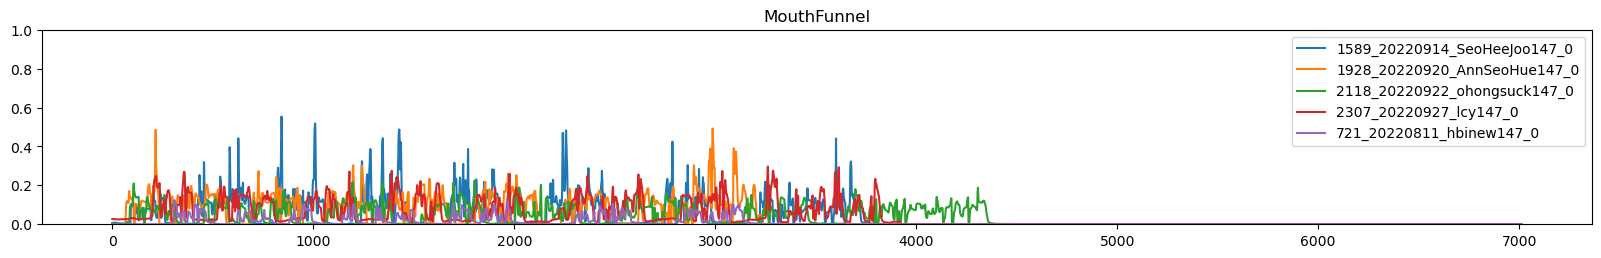

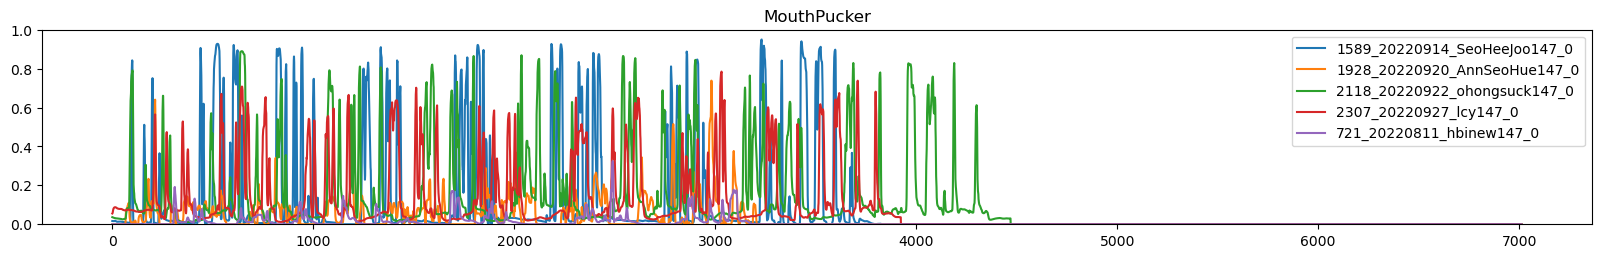

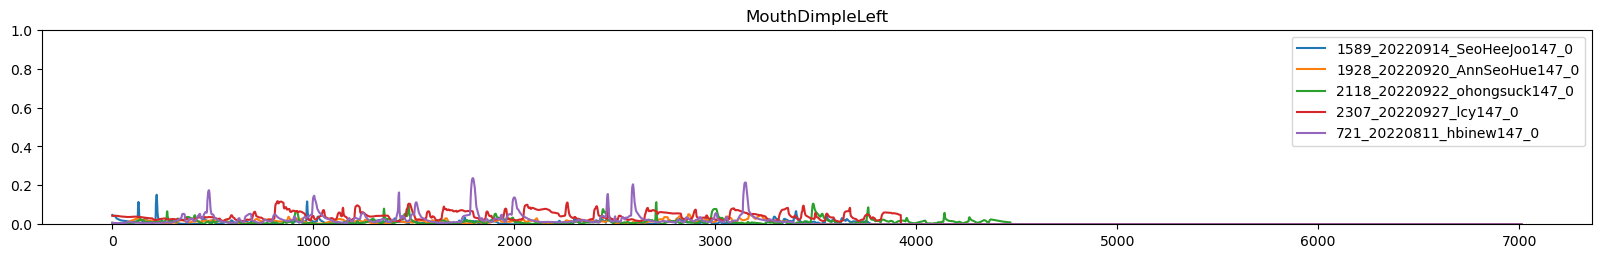

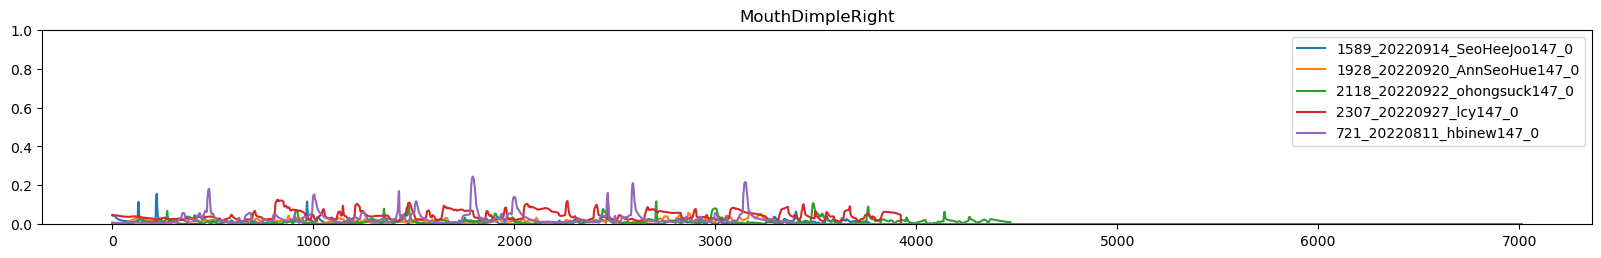

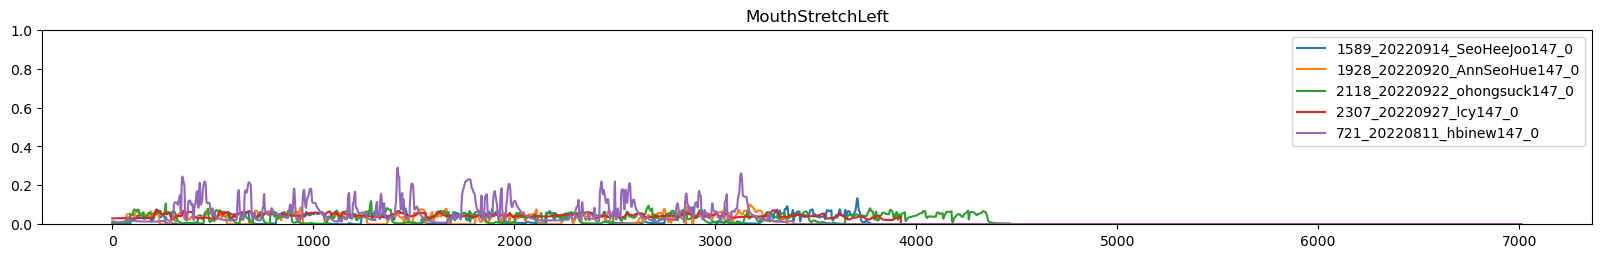

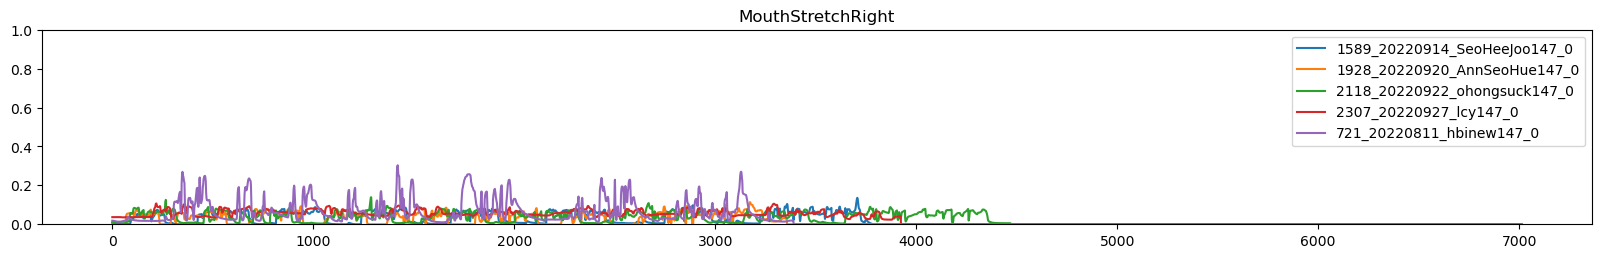

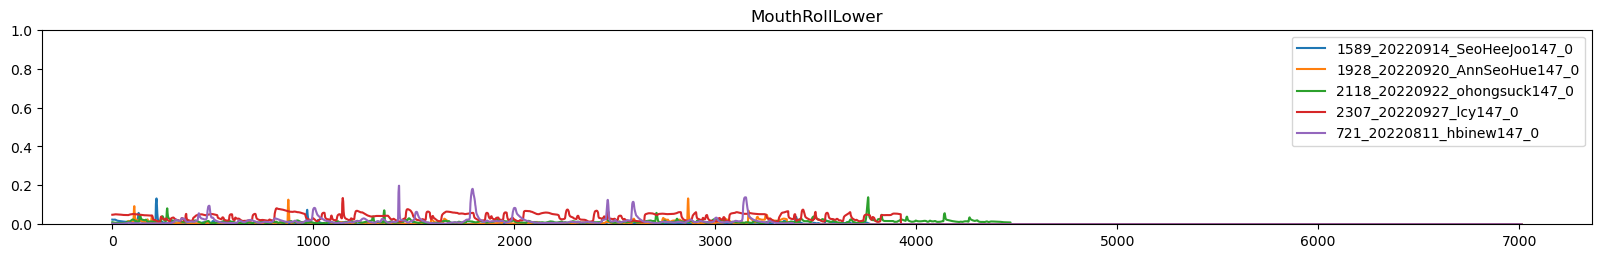

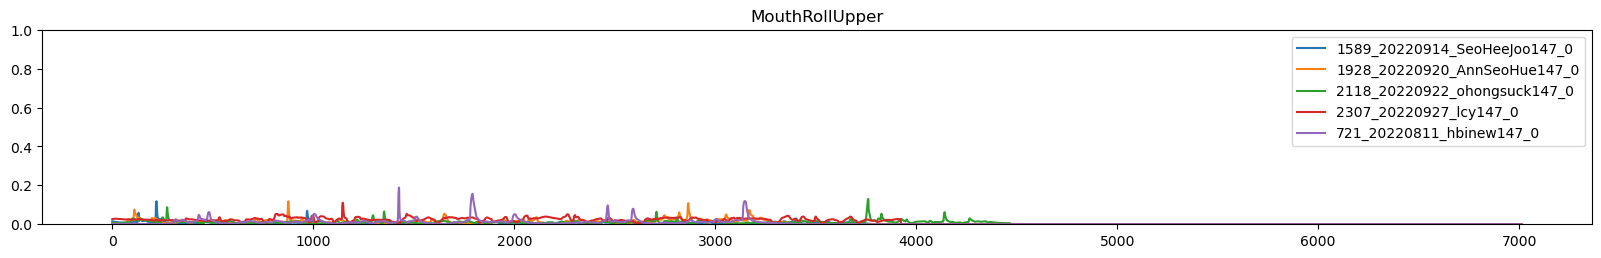

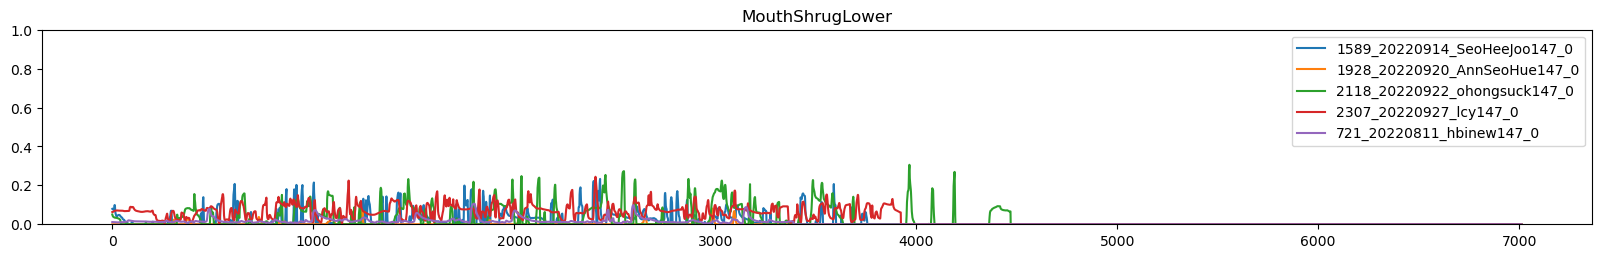

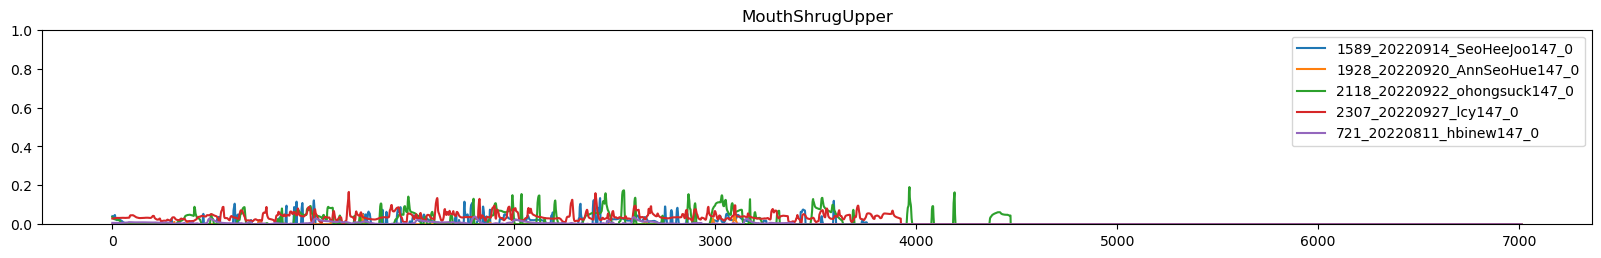

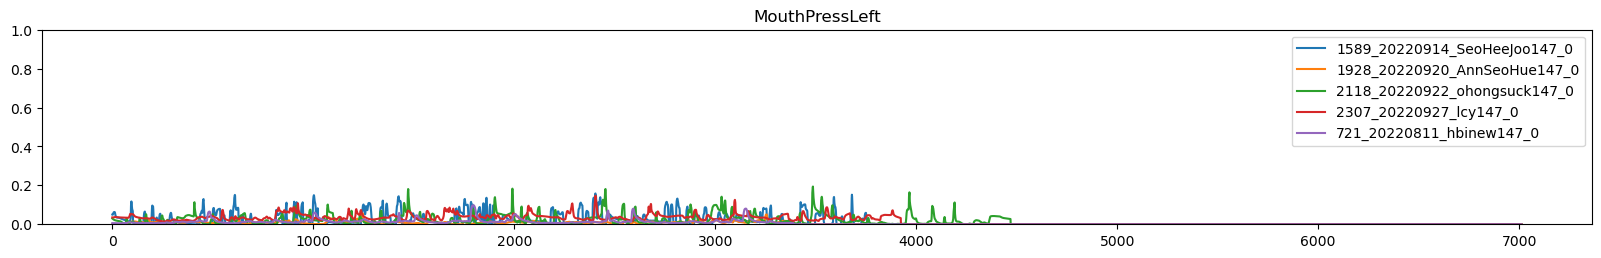

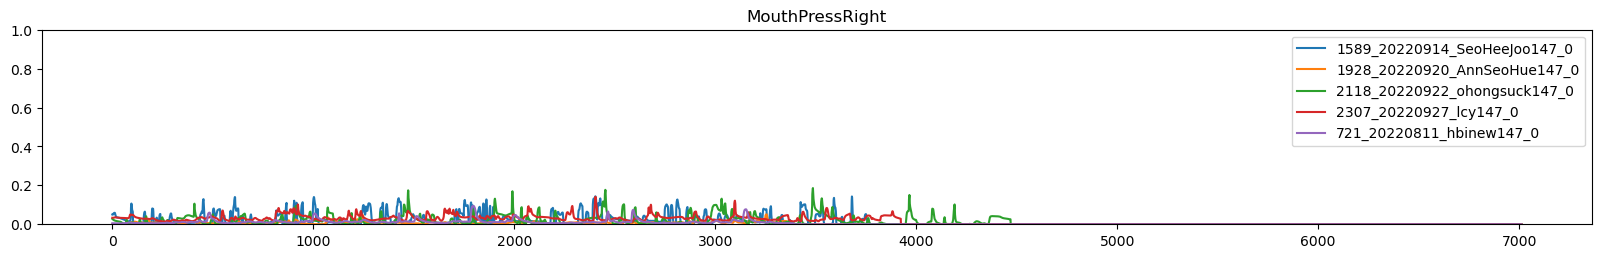

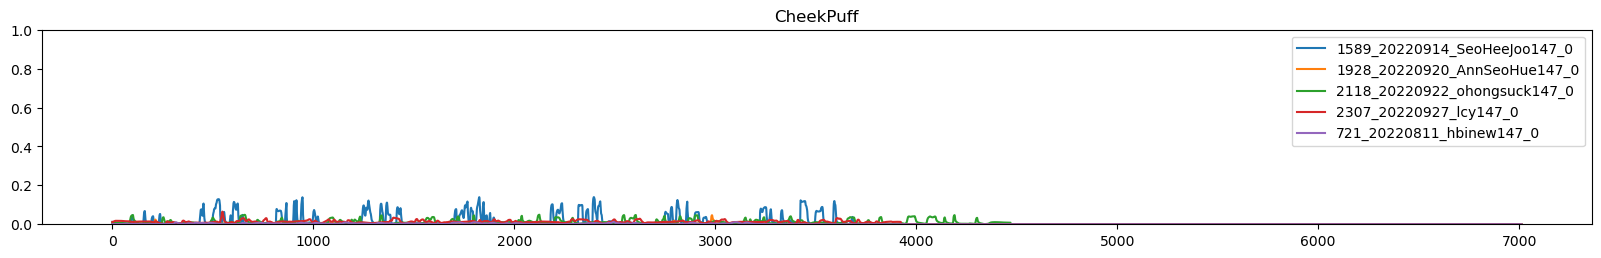

In [54]:
# 같은 sentence 데이터 column 별 graph 찍어보기
sentence = 147
t = np.arange(0, shape_data.shape[1])
for i, column in enumerate(blendshape_columns):
    plt.figure(figsize=(20,3*16))
    plt.subplot(len(blendshape_columns), 1, i+1)
    [plt.plot(t, shape_data[:,:,i][idx], label=name) for idx, name, speaker, level in sentence_dict[sentence] if level=='C']
    plt.legend()
    plt.title(column)
    plt.ylim([0, 1])
    plt.show()

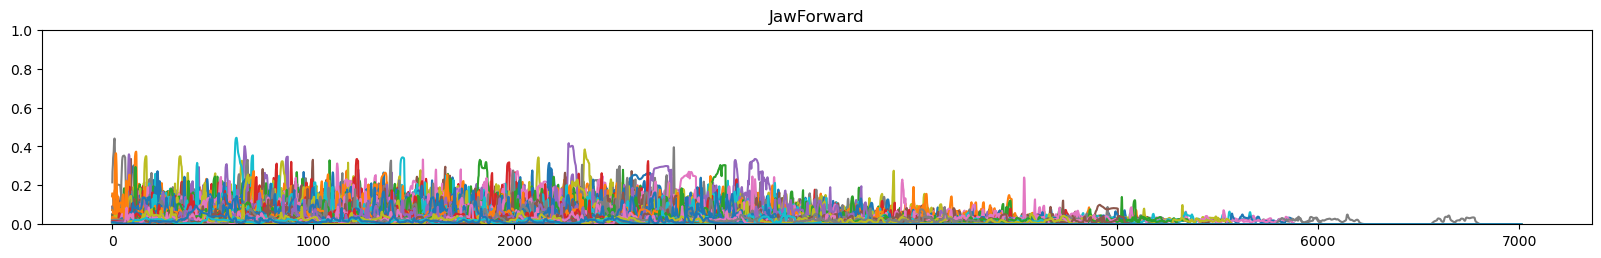

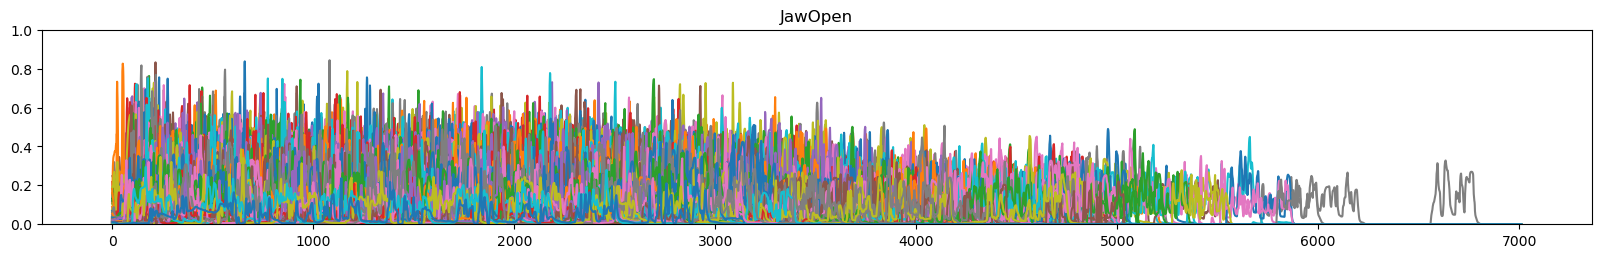

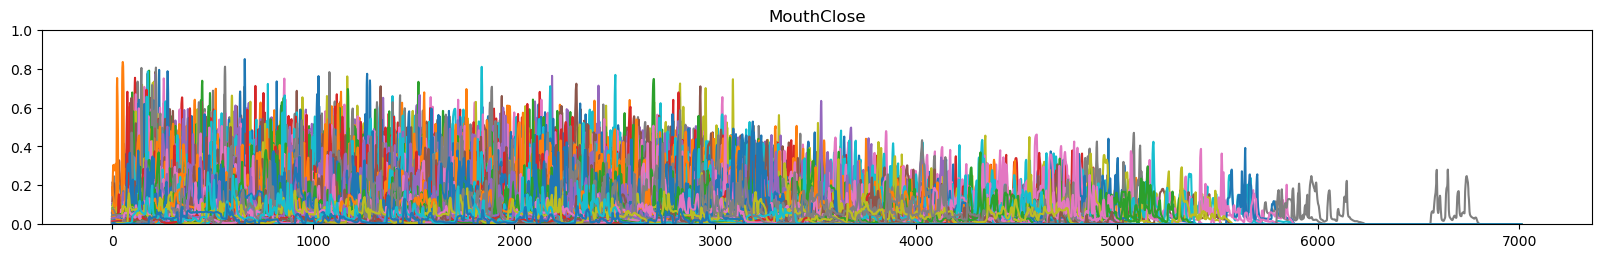

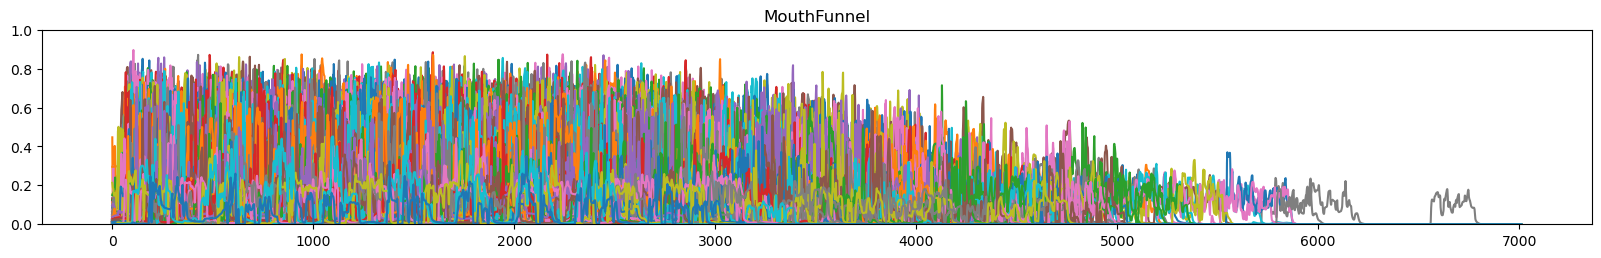

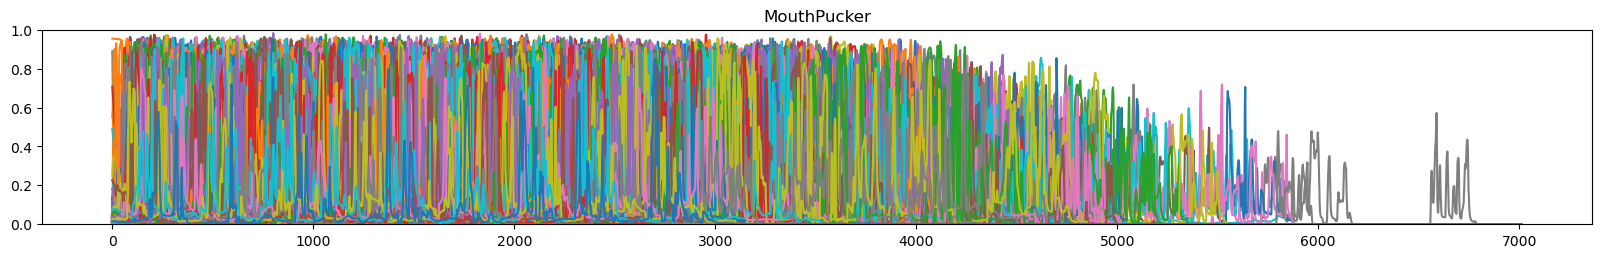

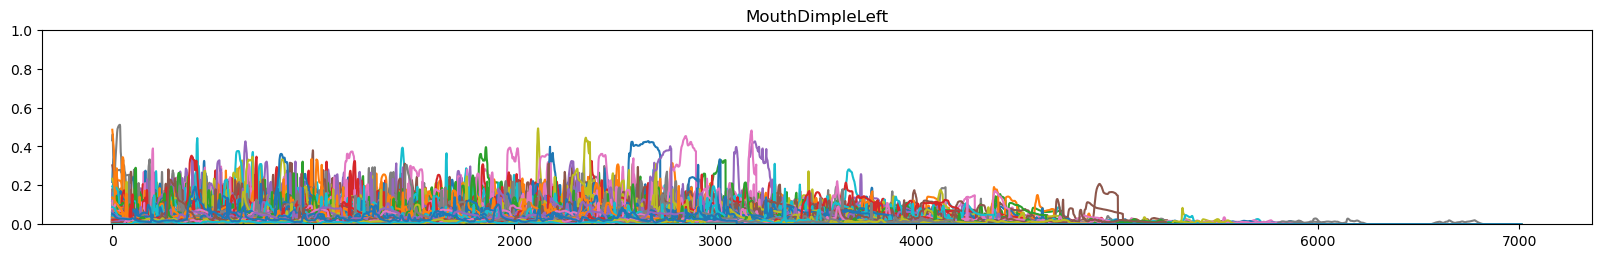

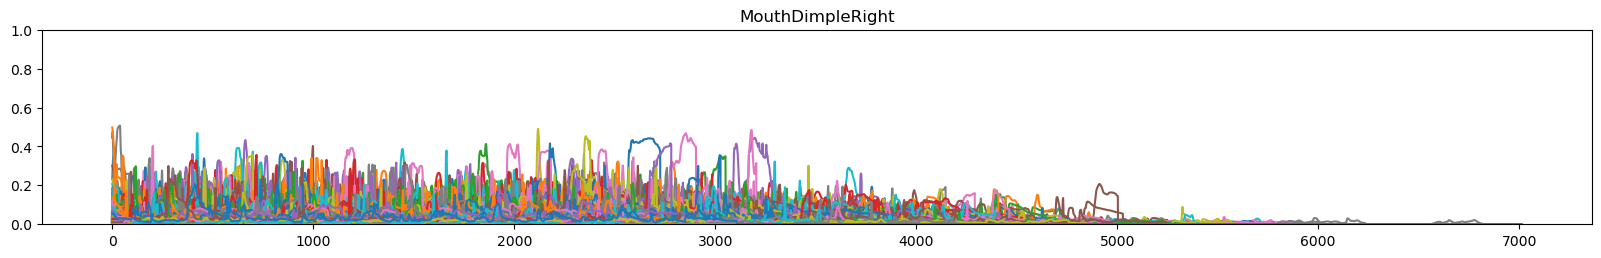

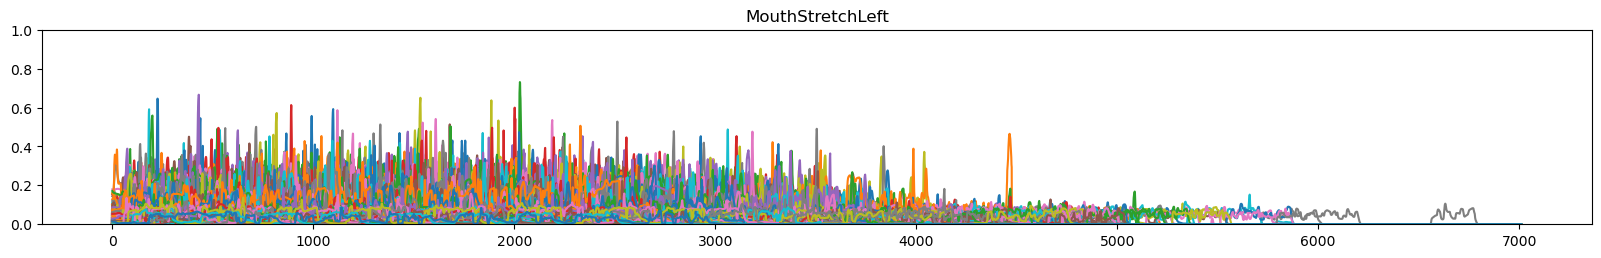

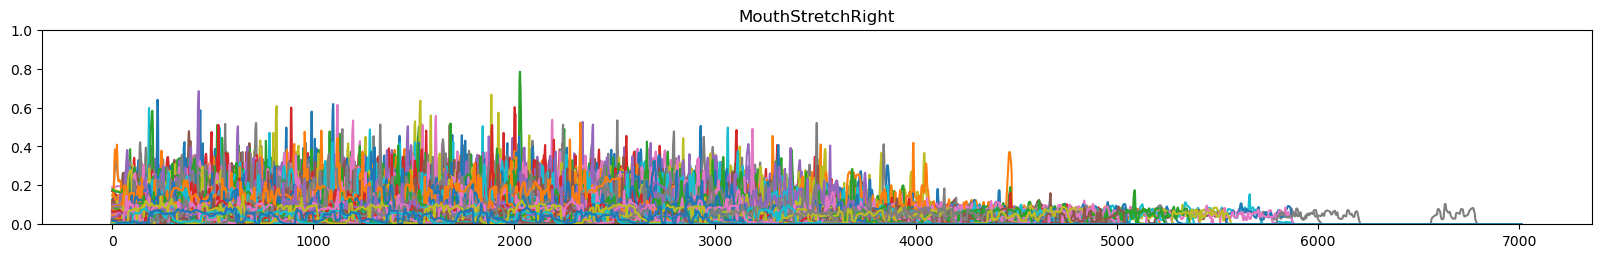

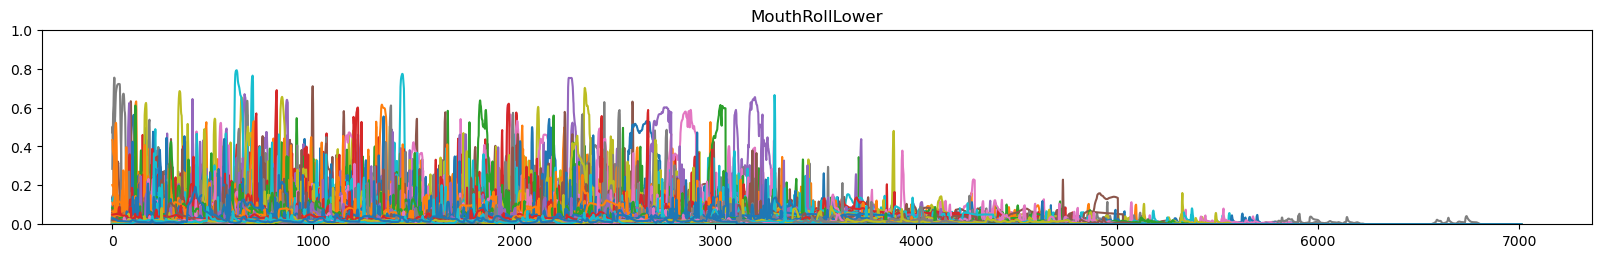

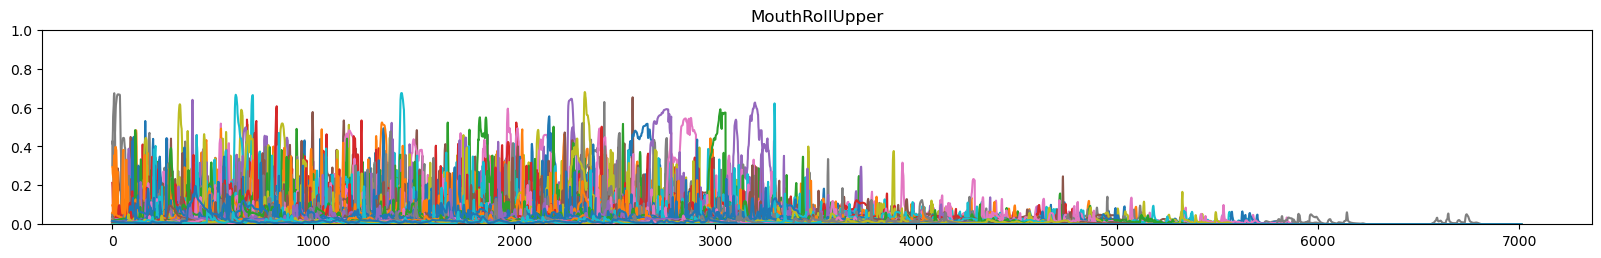

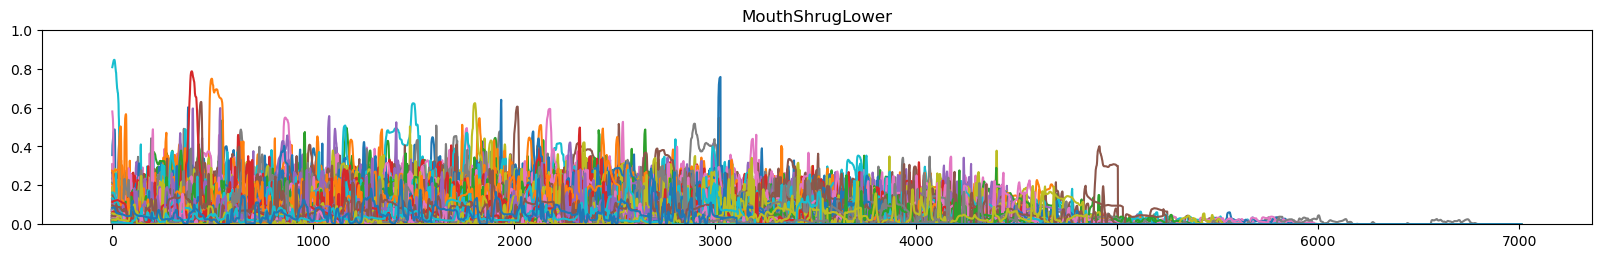

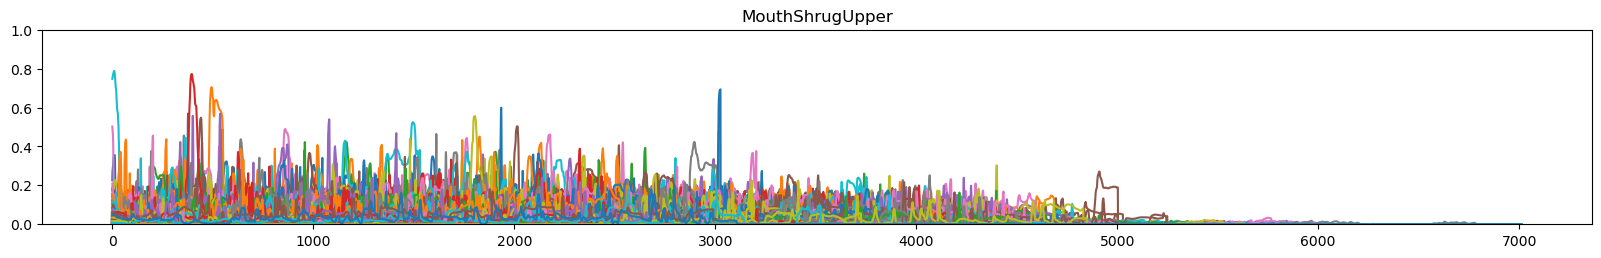

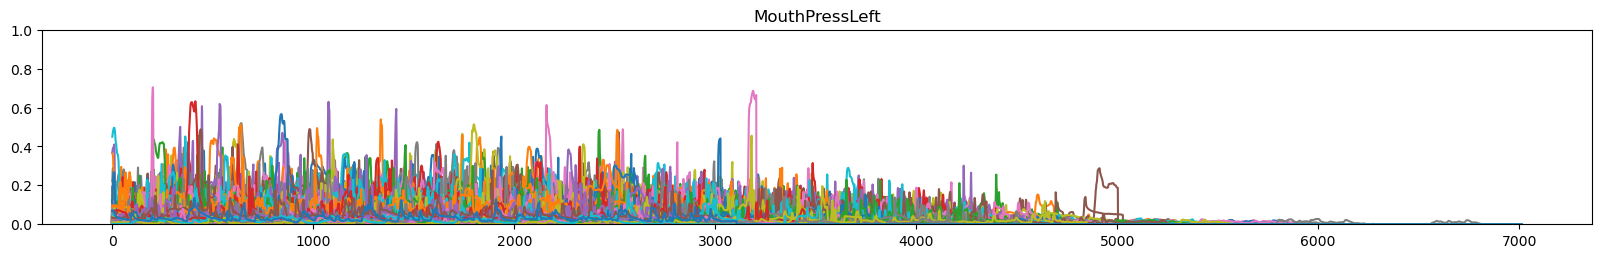

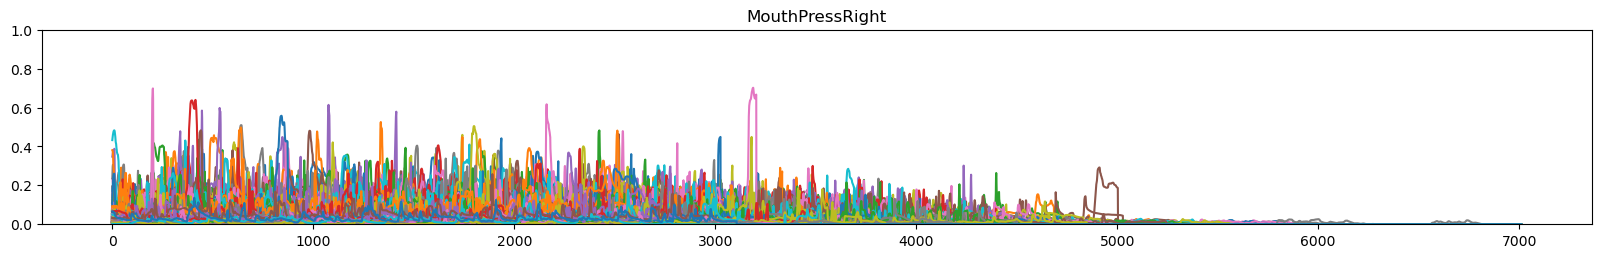

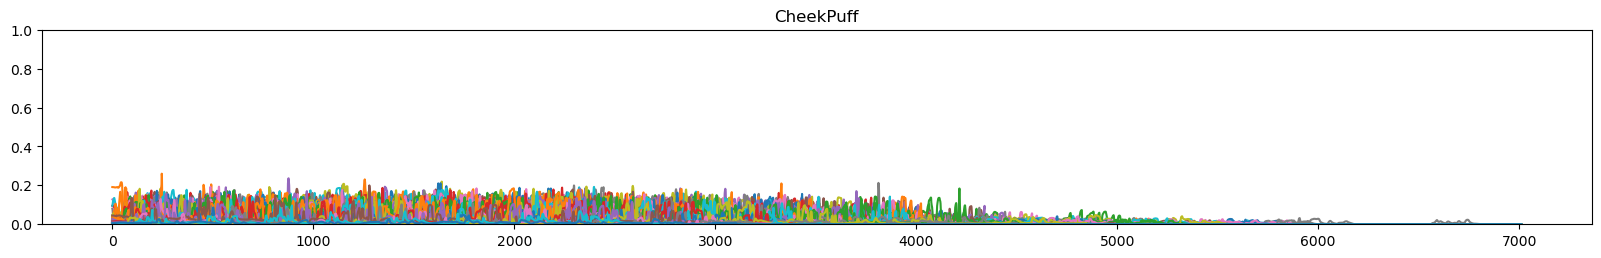

In [34]:
# 전체 데이터 column 별 graph 찍어보기
t = np.arange(0, shape_data.shape[1])
for i, column in enumerate(blendshape_columns):
    plt.figure(figsize=(20,3*16))
    plt.subplot(len(blendshape_columns), 1, i+1)
    [plt.plot(t, shape_data[:,:,i][k]) for k in range(len(shape_data[:,:,i]))]
    plt.title(column)
    plt.ylim([0, 1])
    plt.show()